# Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Deep learning framework
import tensorflow as tf

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning dataset
from sklearn.datasets import load_breast_cancer

# Web app framework
import streamlit as st

# Object serialization
import pickle

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load the dataset
data = load_breast_cancer()

# View the data structure
print(data)  # Displays the dataset description and content

# Access specific parts
print(data.data)          # The feature data
print(data.target)        # The labels (target values)
print(data.feature_names) # The names of the features
print(data.DESCR)         # The full description of the dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

# Data preprocessing and EDA

In [3]:
# Access the feature data
features = data.data

# Display the shape of the data (number of samples, number of features)
print("Shape of feature data:", features.shape)

# Display the first few rows of the data to check the contents
print("First 5 rows of feature data:\n", features[:5])


Shape of feature data: (569, 30)
First 5 rows of feature data:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1

In [4]:
# Access the feature names
feature_names = data.feature_names

# Display the feature names
print("Feature names:\n", feature_names)


Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
# Convert the feature data into a Pandas DataFrame and set column names
data_df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first few rows of the DataFrame
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Add the target column to the DataFrame
data_df["target"] = data.target

# Display the first few rows of the updated DataFrame
data_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# Check the distribution of target values
# 1 - Malignant
# 0 - Benign
data_df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

<Axes: ylabel='Distribution of Target Values'>

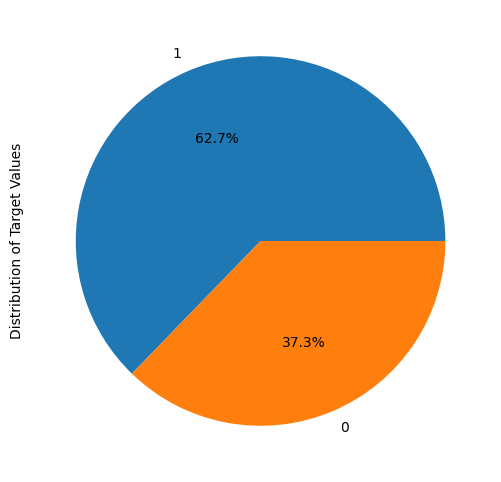

In [8]:
# Compute the percentage distribution of target values
target_perc = data_df["target"].value_counts(normalize=True) * 100

# Plot the percentage distribution as a pie chart
target_perc.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6), ylabel="Distribution of Target Values")



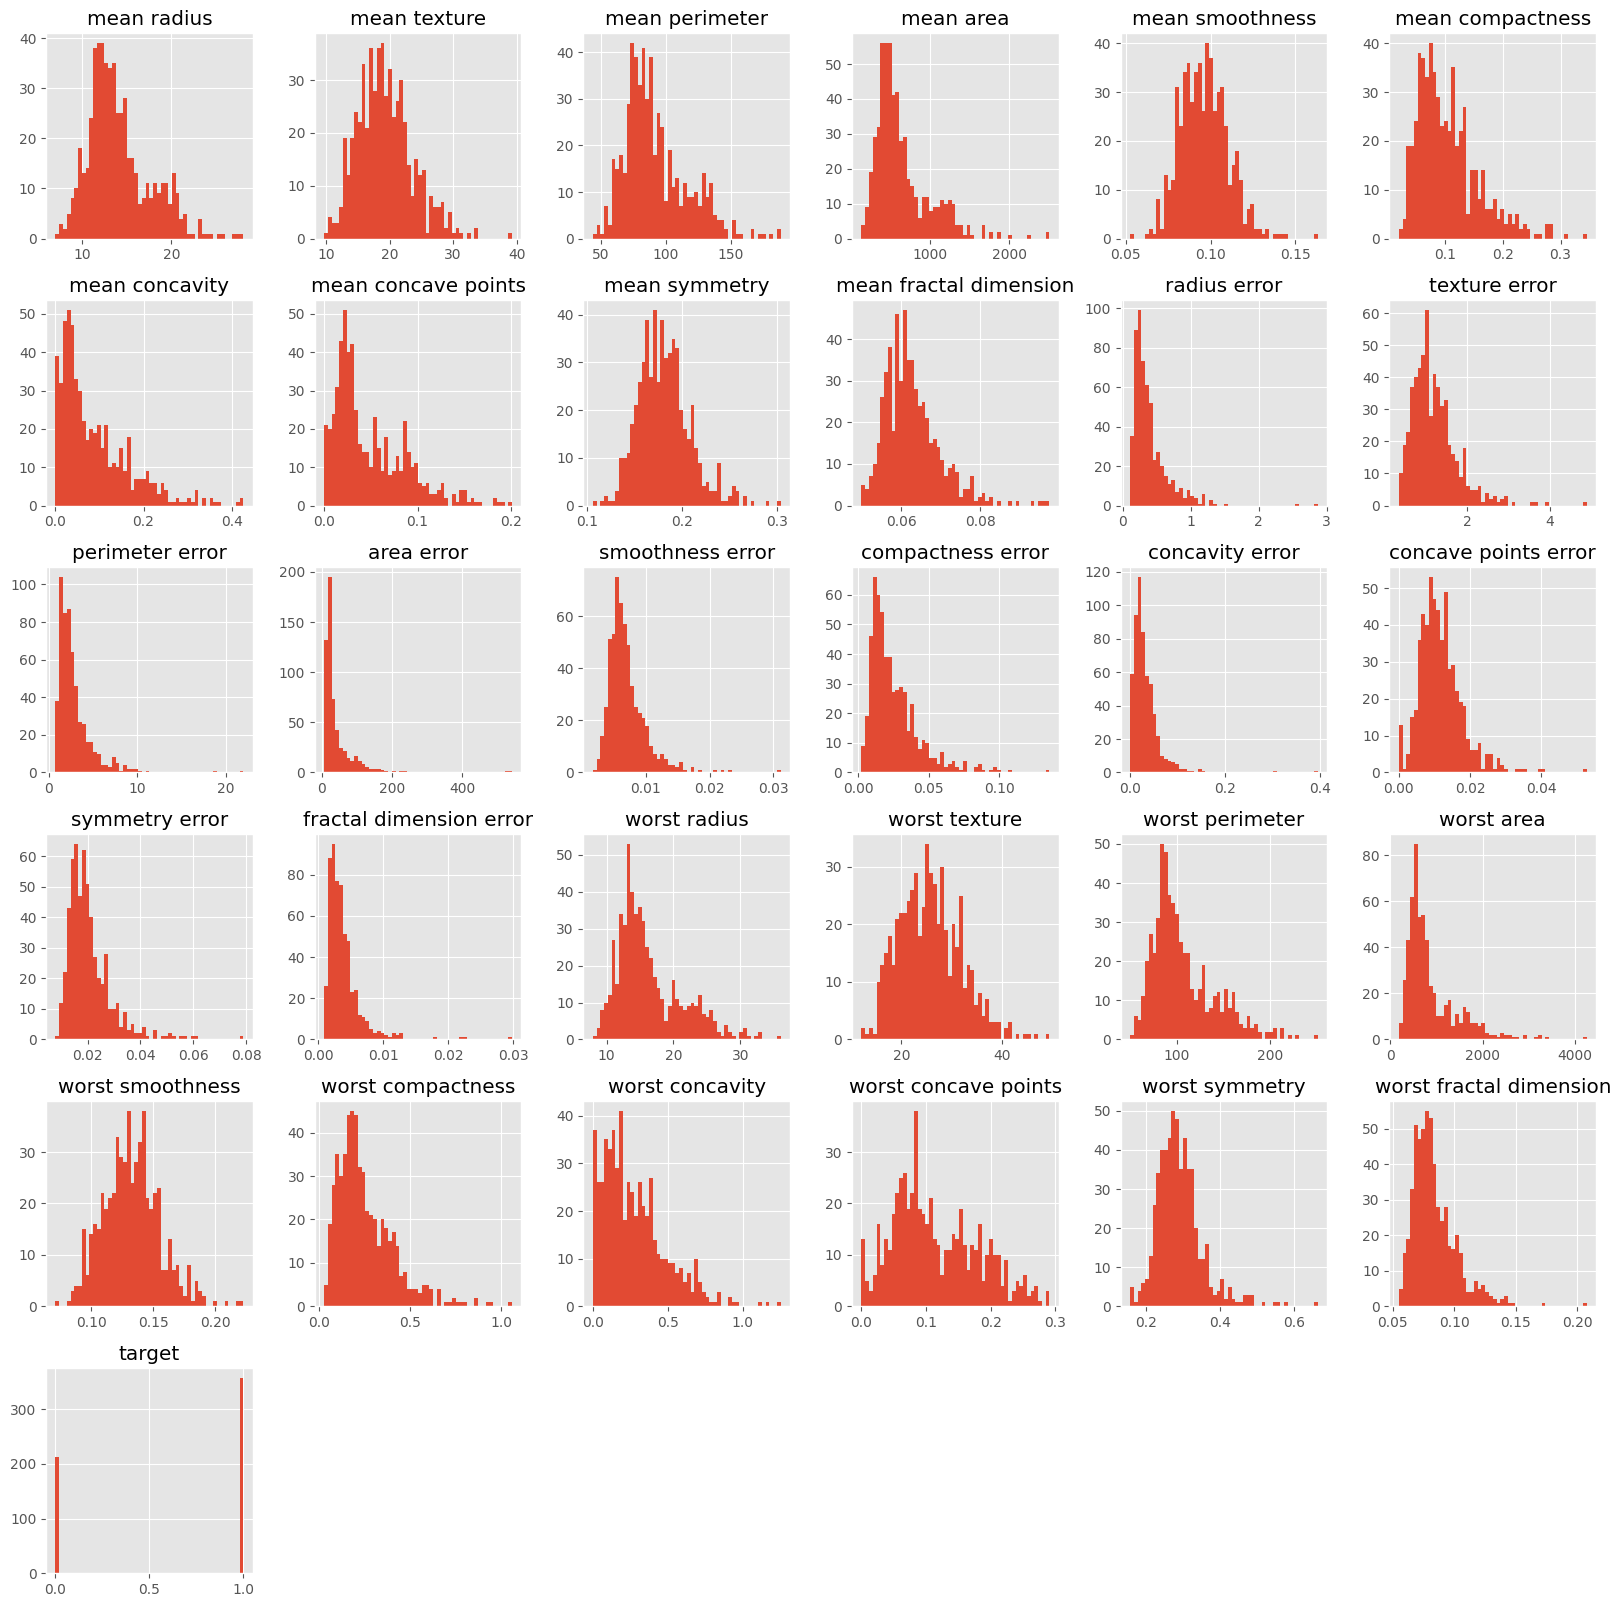

In [9]:
# Set the style for the plots
plt.style.use("ggplot")

# Generate histograms for each feature with 50 bins
data_df.hist(bins=50, figsize=(20, 20))

# Display the plots
plt.show()


# Feature Selection with SelectKBest
- Separate the features into X and target values into y.
- Divide the data into training and test sets.
- Standardize the features using StandardScaler.
- Apply SelectKBest with the chi-squared test to select the top N features.
- Train a Logistic Regression model on the selected features.
- Make predictions on the test set using the trained Logistic Regression model.
- Evaluate the model's performance by checking its accuracy.
- Retrieve and list the selected features.


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

# Prepare features and target
X = data_df.drop("target", axis=1)
y = data_df["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Select the top 10 features using ANOVA F-test (f_classif)
skb = SelectKBest(score_func=f_classif, k=10)
X_train_skb = skb.fit_transform(X_train_scaled, y_train)
X_test_skb = skb.transform(X_test_scaled)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_skb, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_skb)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Retrieve and print selected features
selected_features = X.columns[skb.get_support()]
print("Selected features:", selected_features)


Accuracy: 97.37%
Selected features: Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'],
      dtype='object')


In [12]:
X_train_skb

array([[-1.44075296, -1.36208497, -1.1391179 , ..., -0.97396758,
         4.67282796,  0.9320124 ],
       [ 1.97409619,  2.09167167,  1.85197292, ...,  2.1374055 ,
         1.92862053,  2.6989469 ],
       [-1.39998202, -1.34520926, -1.10978518, ..., -0.99971493,
        -0.64491059, -0.97023893],
       ...,
       [ 0.04880192, -0.06512547, -0.06142266, ..., -0.33927781,
        -1.12796759, -1.23903365],
       [-0.03896885, -0.03137406, -0.15477966, ..., -0.01355621,
         0.63253231,  1.05001236],
       [-0.54860557, -0.60350155, -0.5518995 , ..., -0.58052694,
        -0.76538799, -0.61102866]])

In [13]:
X_train_scaled

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

## Model Tuning and Build ANN Model 
- Load the dataset.
- Assign features to X and target to y.
- Split the data into training and testing sets.
- Scale the features using StandardScaler.
- Define the parameter grid for MLPClassifier.
- Set up GridSearchCV for hyperparameter tuning.
- Fit GridSearchCV to the training data.
- Retrieve and list the best parameters.
- Evaluate the model’s performance.
- Extract parameters and metrics for the best model.
- Display the training and test accuracy scores of the best model.

In [14]:
# Define the parameter grid for MLPClassifier
param_grid = {
    "hidden_layer_sizes": [(10,), (50,), (100,)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.05],
    "learning_rate": ["constant", "adaptive"]
}

# Initialize the MLPClassifier with a maximum of 1000 iterations
mlp = MLPClassifier(max_iter=1000)

# Configure GridSearchCV with the MLPClassifier
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters
print("Best parameters: ", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Extract and display the parameters and metrics from the best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Print the classification report
print(classification_report(y_test, y_pred))

# Display the training and test accuracy of the best model
train_accuracy = best_model.score(X_train_scaled, y_train)
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Training accuracy: {train_accuracy:.2f}")
print(f"Testing accuracy: {test_accuracy:.2f}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Accuracy: 99.12%
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}
Best cross-validation score: 0.9802197802197803
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Training accuracy: 0.98
Testing accuracy: 0.99


In [15]:
X_test_scaled

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [16]:
# Save the best model and the scaler to files
with open("best_model.pkl", 'wb') as model_file:
    pickle.dump(best_model, model_file)

with open("scaler.pkl", 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Best model has been saved.")
print("Scaler has been saved.")


Best model has been saved.
Scaler has been saved.
